In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading Data set
df = pd.read_csv('german.csv', delimiter=',')

Exploratory Data Analysis

In [4]:
#overview of statistics of each col. in dataset
df.describe()

,Duration_of_Credit_monthly,Account_Balance,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Guarantors,...,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Creditability,Foreign_Worker
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,2.577000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,...,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,0.700000,1.037000
std,12.058814,1.257638,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,...,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.458487,0.188856
min,4.000000,1.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,12.000000,1.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,...,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000,1.000000
50%,18.000000,2.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,...,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000
75%,24.000000,4.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,...,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000,1.000000
max,72.000000,4.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,...,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,1.000000,2.000000


In [5]:
#data content 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Duration_of_Credit_monthly         1000 non-null   int64
 1   Account_Balance                    1000 non-null   int64
 2   Payment_Status_of_Previous_Credit  1000 non-null   int64
 3   Purpose                            1000 non-null   int64
 4   Credit_Amount                      1000 non-null   int64
 5   Value_Savings_Stocks               1000 non-null   int64
 6   Length_of_current_employment       1000 non-null   int64
 7   Instalment_per_cent                1000 non-null   int64
 8   Sex_Marital_Status                 1000 non-null   int64
 9   Guarantors                         1000 non-null   int64
 10  Duration_in_Current_address        1000 non-null   int64
 11  Most_valuable_available_asset      1000 non-null   int64
 12  Age_years            

In [6]:
#finding no. of unique values in each col
df.nunique()

Duration_of_Credit_monthly            33
Account_Balance                        4
Payment_Status_of_Previous_Credit      5
Purpose                               10
Credit_Amount                        923
Value_Savings_Stocks                   5
Length_of_current_employment           5
Instalment_per_cent                    4
Sex_Marital_Status                     4
Guarantors                             3
Duration_in_Current_address            4
Most_valuable_available_asset          4
Age_years                             53
Concurrent_Credits                     3
Type_of_apartment                      3
No_of_Credits_at_this_Bank             4
Occupation                             4
No_of_dependents                       2
Telephone                              2
Creditability                          2
Foreign_Worker                         2
dtype: int64

In [7]:
num_columns = ["Age_years", "Duration_of_Credit_monthly", "Credit_Amount"]
cat_columns = df.columns.difference(num_columns).tolist()
num_columns

['Age_years', 'Duration_of_Credit_monthly', 'Credit_Amount']

In [8]:
#extracting unique values in each col.
columns = df.columns
for col in columns:
    unique_values = df[col].unique()
    numeric = pd.api.types.is_numeric_dtype(df[col])
    print(f"{col} ({df[col].dtype})")
    
    if numeric:
        unique_values = np.sort(unique_values)
        
    if numeric and len(unique_values) > 20:
        print(unique_values[:10], " ... ", unique_values[-10:])
    else:
        print(unique_values)

Duration_of_Credit_monthly (int64)
[ 4  5  6  7  8  9 10 11 12 13]  ...  [36 39 40 42 45 47 48 54 60 72]
Account_Balance (int64)
[1 2 3 4]
Payment_Status_of_Previous_Credit (int64)
[0 1 2 3 4]
Purpose (int64)
[ 0  1  2  3  4  5  6  8  9 10]
Credit_Amount (int64)
[250 276 338 339 343 362 368 385 392 409]  ...  [14318 14421 14555 14782 14896 15653 15672 15857 15945 18424]
Value_Savings_Stocks (int64)
[1 2 3 4 5]
Length_of_current_employment (int64)
[1 2 3 4 5]
Instalment_per_cent (int64)
[1 2 3 4]
Sex_Marital_Status (int64)
[1 2 3 4]
Guarantors (int64)
[1 2 3]
Duration_in_Current_address (int64)
[1 2 3 4]
Most_valuable_available_asset (int64)
[1 2 3 4]
Age_years (int64)
[19 20 21 22 23 24 25 26 27 28]  ...  [62 63 64 65 66 67 68 70 74 75]
Concurrent_Credits (int64)
[1 2 3]
Type_of_apartment (int64)
[1 2 3]
No_of_Credits_at_this_Bank (int64)
[1 2 3 4]
Occupation (int64)
[1 2 3 4]
No_of_dependents (int64)
[1 2]
Telephone (int64)
[1 2]
Creditability (int64)
[0 1]
Foreign_Worker (int64)
[1 2

<Figure size 500x500 with 0 Axes>

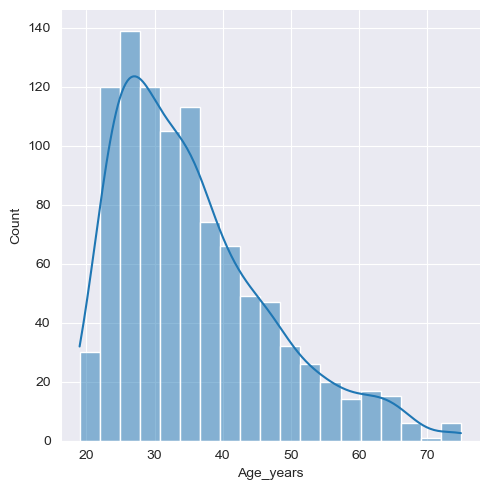

<Figure size 500x500 with 0 Axes>

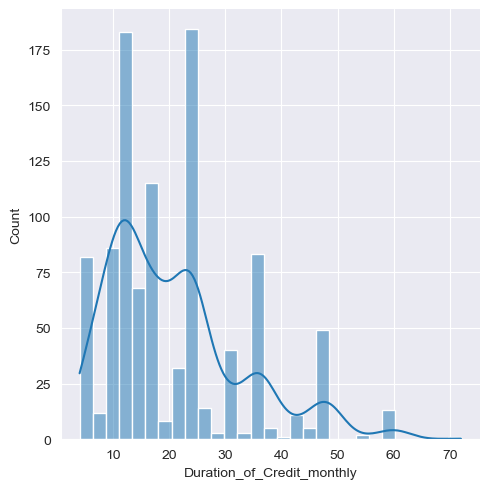

<Figure size 500x500 with 0 Axes>

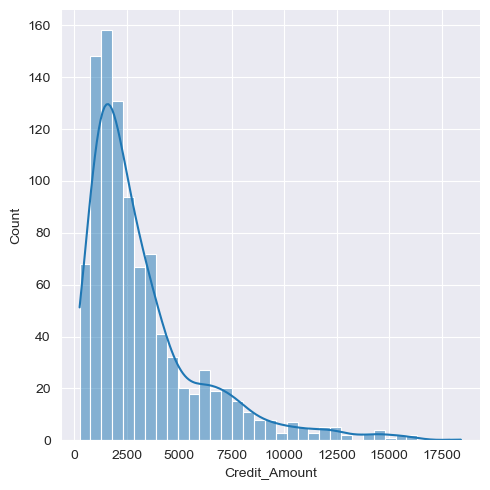

In [9]:
#exploratory data analysis
for col in num_columns:
    plt.figure(figsize = (5,5))
    sns.displot(df[col], kde = True, alpha = 0.5)
    plt.show()

<Axes: xlabel='Age_years', ylabel='count'>

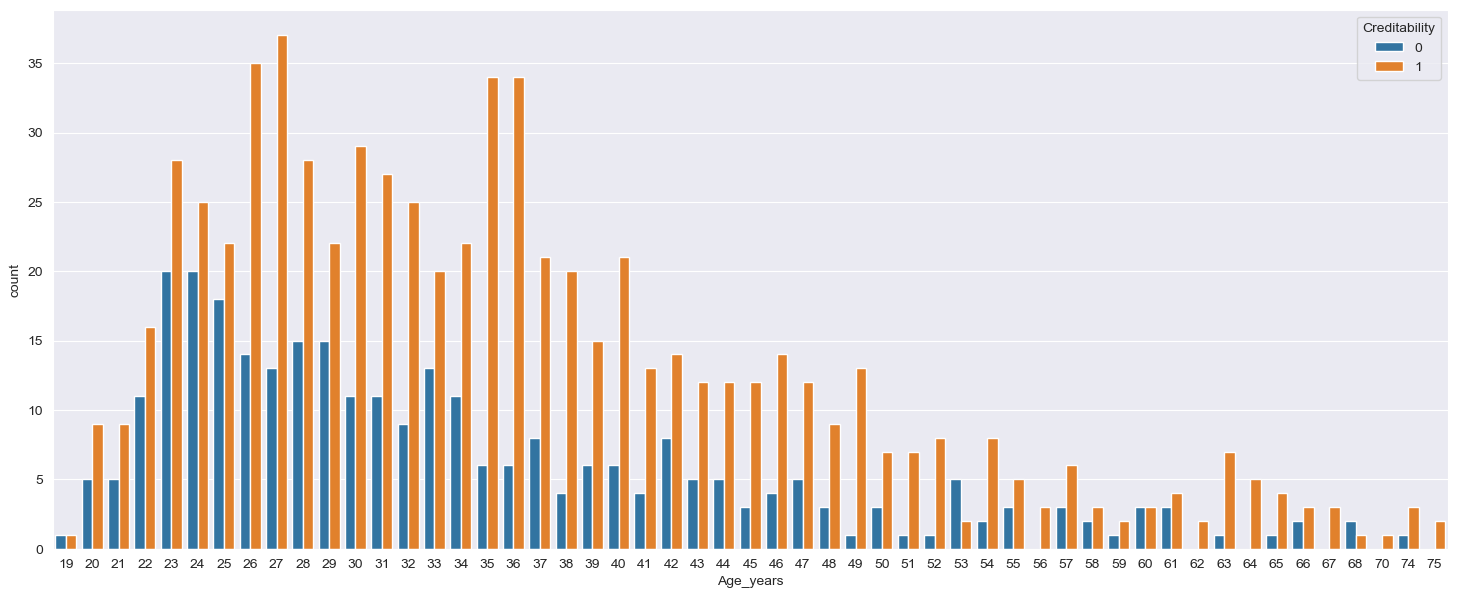

In [10]:
plt.figure(figsize= (18,7))
sns.countplot(x = df["Age_years"], hue = df["Creditability"])

from the sown plot, age range of 23 - 36 are more like to get accepted for loans

<Axes: xlabel='Creditability', ylabel='count'>

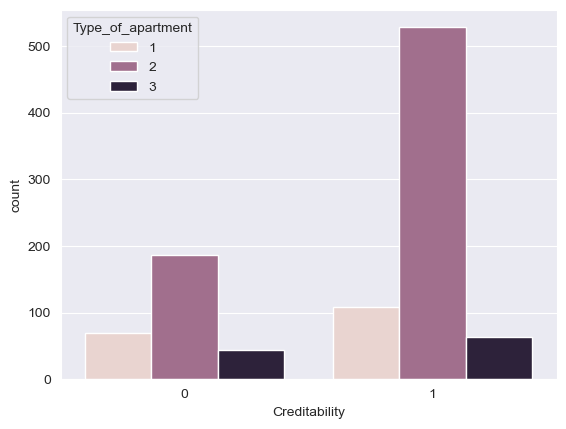

In [11]:
sns.countplot(x = "Creditability", hue = "Type_of_apartment", data = df)

category 2 (owned houses) are more likely to be accepted for loan over the other two categories {rented houses ---> 1 & free citizens ---> 3}

Cleaning data from outliers in numerical columns:

Age_years (4.5, 64.5)
Age_years : 23
Duration_of_Credit_monthly (0, 42.0)
Duration_of_Credit_monthly : 70
Credit_Amount (0, 7882.375)
Credit_Amount : 72


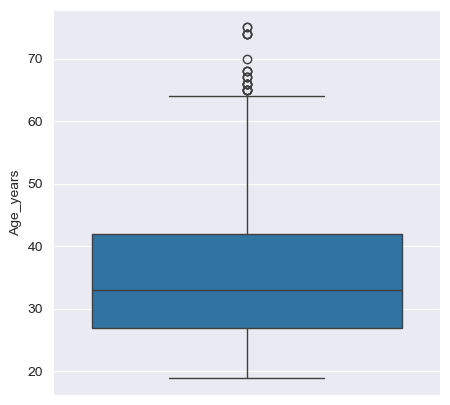

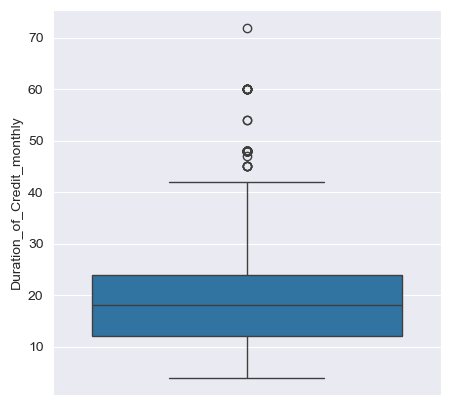

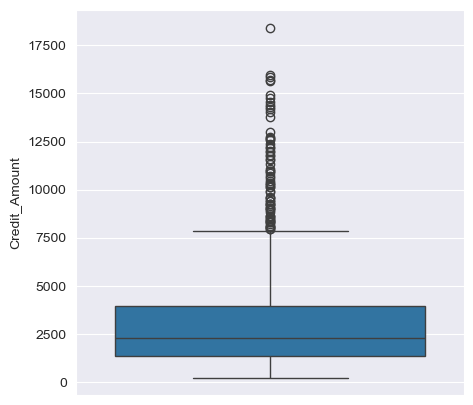

In [12]:
#outliers detection
for col in num_columns:
    plt.figure(figsize = (5,5))
    sns.boxplot(df[col])
def iqr_detect(data, column):
    q3 = data[column].quantile(0.75)
    q1 = data[column].quantile(0.25)
    iqr = q3 - q1
    lower_limit = q1 - (1.5 * iqr)
    upper_limit = q3 + (1.5 * iqr)
    return lower_limit, upper_limit
def outliers_detect(data, column):
    for col in num_columns:
        low_limit, up_limit = iqr_detect(df, col)
        if low_limit < 0: low_limit = int(0)
        print(f"{col} ({low_limit}, {up_limit})")
        if df[(df[col] > up_limit) | (df[col] < low_limit)].any(axis=None):
            number_of_outliers = df[(df[col] > up_limit) | (df[col] < low_limit)].shape[0]
            print(col, ":", number_of_outliers)
outliers_detect(df, num_columns)

In [13]:
# outliers samples in dataset
df.loc[(df["Age_years"] > 64)  |
       (df["Duration_of_Credit_monthly"] > 42) |
       (df["Credit_Amount"] > 7882.375)
]

,Duration_of_Credit_monthly,Account_Balance,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Guarantors,...,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Creditability,Foreign_Worker
8,18,4,4,3,1098,1,1,4,2,1,...,3,65,3,2,2,1,1,1,1,1
13,48,2,3,10,7582,2,1,2,3,1,...,4,31,3,2,1,4,1,2,1,1
62,48,4,4,3,3578,5,5,4,3,1,...,1,47,3,2,1,3,1,2,1,1
63,36,4,3,0,10875,1,5,2,3,1,...,3,45,3,2,2,3,2,2,1,1
152,48,4,4,1,8858,5,4,2,3,1,...,4,35,3,3,2,3,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,48,2,4,2,5096,1,3,2,2,1,...,3,30,3,2,1,4,1,2,0,1
984,48,1,2,3,6999,1,4,1,4,3,...,1,34,3,2,2,3,1,2,0,1
986,14,1,2,0,8978,1,5,1,1,1,...,2,45,3,2,1,4,1,2,0,2
991,24,2,2,1,12579,1,5,4,2,1,...,4,44,3,3,1,4,1,2,0,1


In [14]:
#outliers removal
def outliers_removal(data, columns):
    copy = data
    for col in columns:
        low_limit, up_limit = iqr_detect(data, col)
        copy.loc[(copy[col] > up_limit), col] = up_limit
    return copy
clean_df = outliers_removal(df, num_columns)

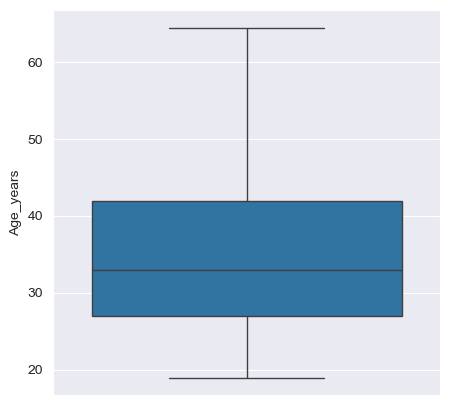

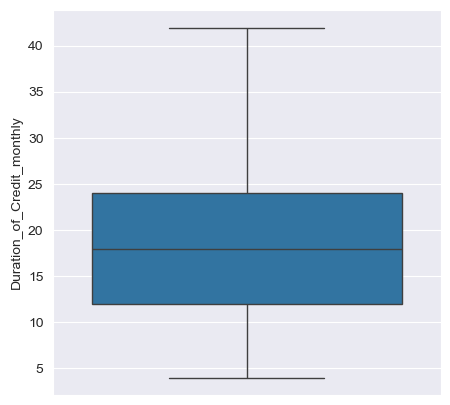

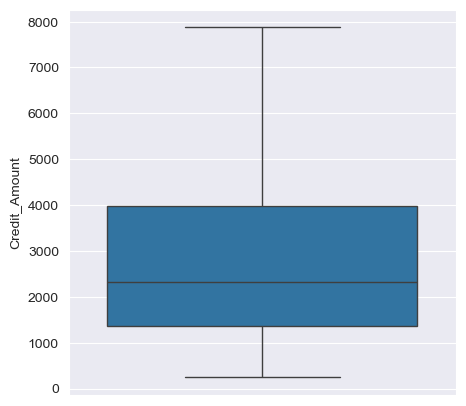

In [15]:
for col in num_columns:
    plt.figure(figsize = (5,5))
    sns.boxplot(clean_df[col])

<Axes: >

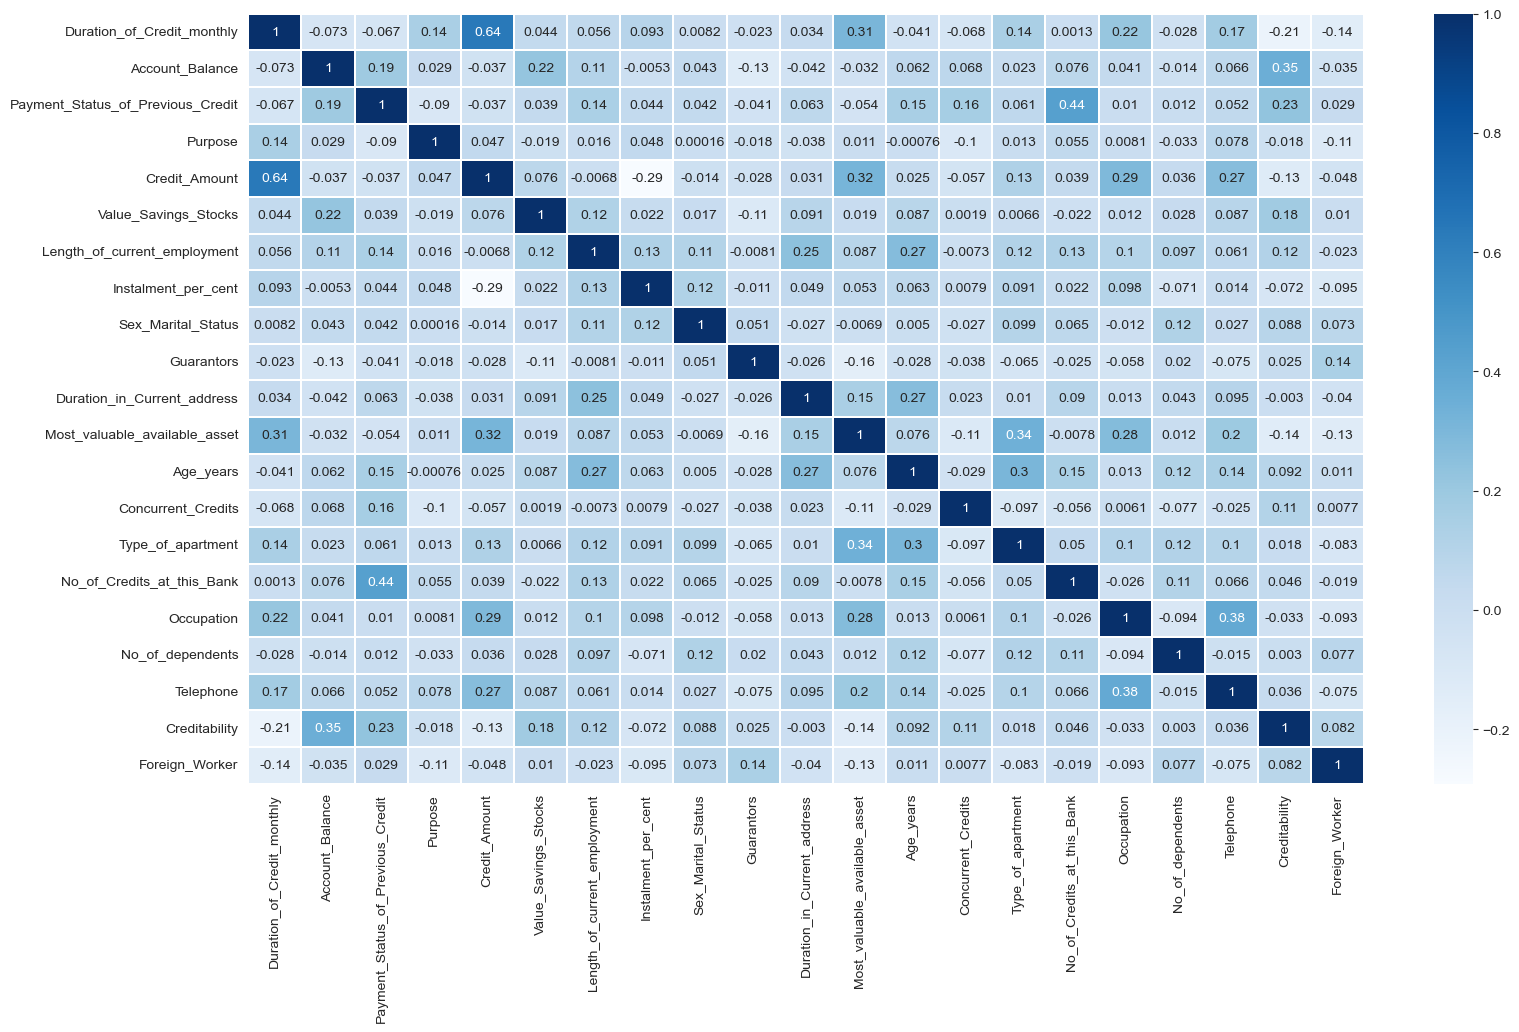

In [16]:
#correlation 
corr = clean_df.corr()
plt.figure(figsize  = (18, 10))
sns.heatmap(corr, annot = True, cmap = "Blues", linewidth = 0.1)

<Axes: >

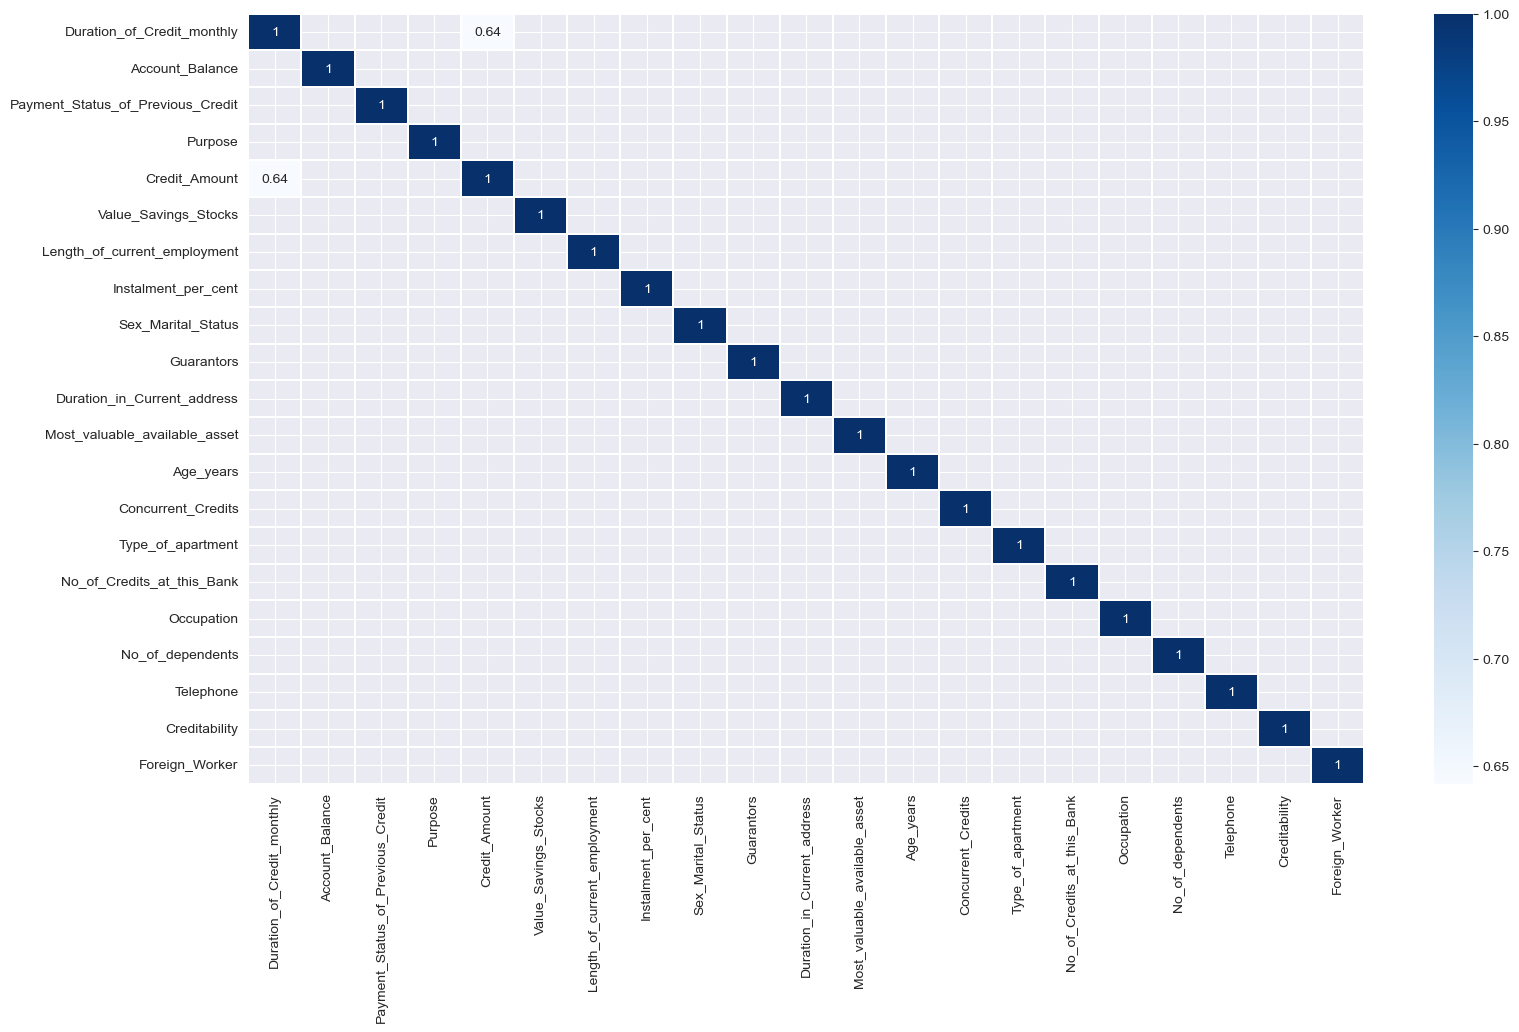

In [17]:
plt.figure(figsize= (18, 10))
sns.heatmap(corr[(corr >= 0.45)|(corr <= -0.45)], annot = True, linewidth = 0.1, cmap = 'Blues')

#duration_of_credit_monthly & credit_amount are highly correlated (expected)

heat map shows huge correlation between Credit_amount & duration_of_credit_monthly

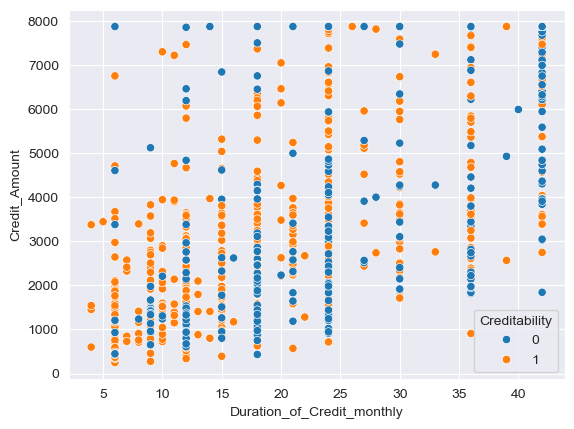

In [18]:
sns.scatterplot(y = clean_df["Credit_Amount"], x = clean_df["Duration_of_Credit_monthly"], hue = clean_df["Creditability"])
plt.show()

#separating features from target for modeling


In [19]:
features = clean_df.iloc[:, df.columns != "Creditability"]
target = clean_df.iloc[:, df.columns == "Creditability"]

<Axes: xlabel='Creditability', ylabel='count'>

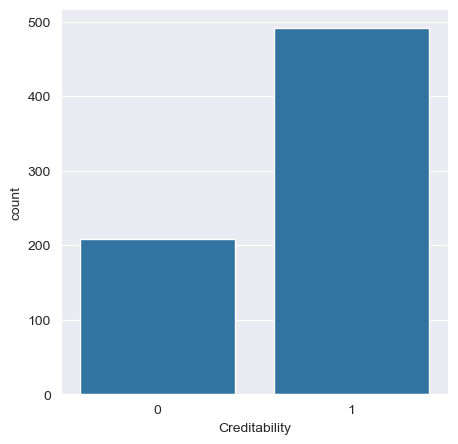

In [198]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, random_state= 42, test_size = 0.3, shuffle = True)

plt.figure(figsize = (5,5))
sns.countplot(x = "Creditability", data = y_train)


Imbalance between the classes will cause errors in predictions and performance, over sampling for clas '0' will be used to moderate the targets in the  training data set  


In [199]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

Creditability    984
dtype: int64
Creditability    300
dtype: int64
1000


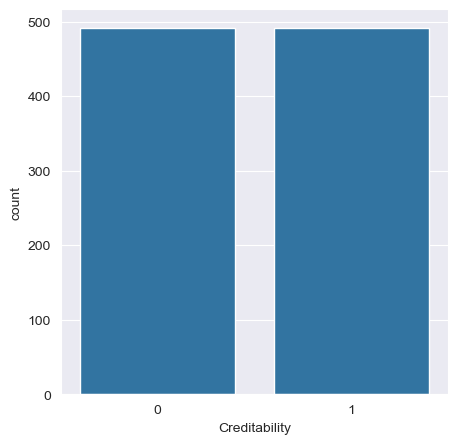

In [148]:
plt.figure(figsize = (5,5))
sns.countplot(x = "Creditability", data = y_train)
print(y_train.count())
print(y_test.count())
print(df['Creditability'].count())

Data Modeling for modeling data, 5 classification algorithms will be used which are [Logistic regression -K Nearest Neighbours -Support Vector Machines -Random Forest -Naive Bayes] and in the end the best model will be chosen for deployment and usage in real life scenarios

In [149]:
#imports
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

1- logestic regression

In [80]:
lr = LogisticRegression(solver= 'newton-cg', 
                        class_weight = 'balanced')

lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
y_proba_lr = lr.predict_proba(x_test)[:, 1]

In [ ]:
#model evaluation 
cm = metrics.confusion_matrix(y_pred_lr, y_test)
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', yticklabels=['Non-creditable', 'creditable'])
plt.ylabel('predictions')
plt.xlabel('Real values')
plt.title('confusion matrix for Logistic Regression')

In [82]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.60      0.66      0.63        92
           1       0.84      0.80      0.82       208

    accuracy                           0.76       300
   macro avg       0.72      0.73      0.73       300
weighted avg       0.77      0.76      0.76       300



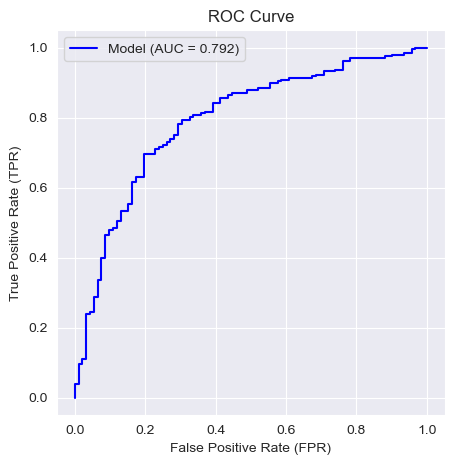

In [83]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_proba_lr)
auc_lr = metrics.roc_auc_score(y_test, y_proba_lr)

# Plot
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label=f"Model (AUC = {auc_lr:.3f})", color='blue')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="upper left")  
plt.show()

In [84]:
#cross validation for 5 folds of data
kf = KFold(n_splits=5, shuffle=True)
result = cross_val_score(lr, x_train, y_train , cv=kf, scoring="accuracy")
print(result)
print("Max Accuracy: ", result.max())
print("Avg. Accuracy: ", result.mean())

[0.79187817 0.83756345 0.78680203 0.81725888 0.78571429]
Max Accuracy:  0.8375634517766497
Avg. Accuracy:  0.8038433647570704


In [228]:
LogisticRegression = [metrics.accuracy_score(y_test, y_pred_lr),
                      metrics.precision_score(y_test, y_pred_lr),
                      metrics.recall_score(y_test, y_pred_lr),
                      metrics.f1_score(y_test, y_pred_lr),
                      auc_lr]
LogisticRegression

[0.76,
 0.8434343434343434,
 0.8028846153846154,
 0.8226600985221675,
 0.7921718227424749]

2- KNN

In [68]:
max_k = 80
f1s = {}
losses = {}
for k in range (1, max_k):
    knn = KNeighborsClassifier(n_neighbors= k, weights='distance')
    knn_model = knn.fit(x_train, y_train)
    y_pred_knn = knn_model.predict(x_test)
    y_proba_knn = knn_model.predict_proba(x_test)[:, 1]
    f1 = round(metrics.f1_score(y_pred_knn, y_test), 3)
    loss = round(metrics.log_loss(y_test, y_proba_knn), 3)
    f1s[k] = f1
    losses[k] = loss

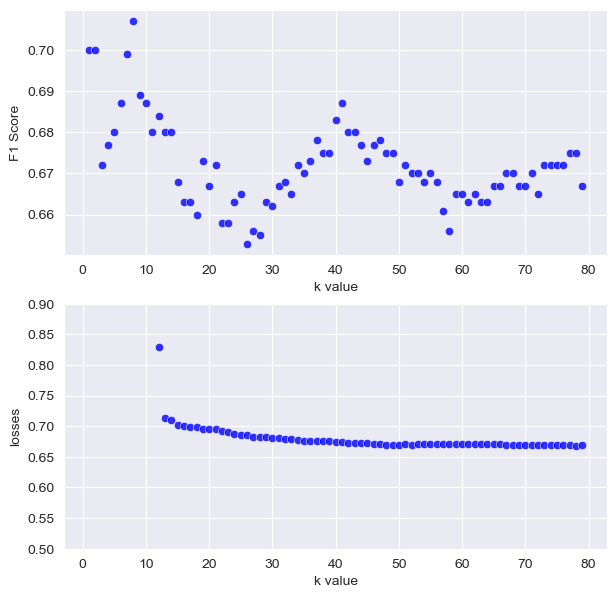

In [69]:
plt.figure(figsize = (7,7))

plt.subplot(2, 1, 1)
sns.scatterplot(x = f1s.keys(), y = f1s.values(), color = 'Blue', alpha = 0.8)
plt.xlabel("k value")
plt.ylabel("F1 Score")

plt.subplot(2, 1, 2)
sns.scatterplot(x = losses.keys(), y = losses.values(), color = 'blue', alpha = 0.8)
plt.xlabel("k value")
plt.ylabel("losses")
plt.ylim(0.5,0.9)

plt.show()

from the two curves, it is shown that hte best k value is 41

In [70]:
knn = KNeighborsClassifier(
    n_neighbors=41,
    weights= 'distance'
)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
y_proba_knn = knn.predict_proba(x_test)[:, 1]

Text(0.5, 1.0, 'confusion matrix for KNN')

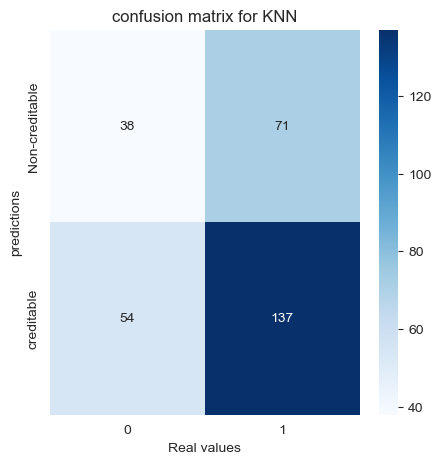

In [105]:
#model evaluation 
from sklearn import metrics
cm = metrics.confusion_matrix(y_pred_knn, y_test)
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', yticklabels=['Non-creditable', 'creditable'])
plt.ylabel('predictions')
plt.xlabel('Real values')
plt.title('confusion matrix for KNN')

In [73]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.35      0.41      0.38        92
           1       0.72      0.66      0.69       208

    accuracy                           0.58       300
   macro avg       0.53      0.54      0.53       300
weighted avg       0.60      0.58      0.59       300



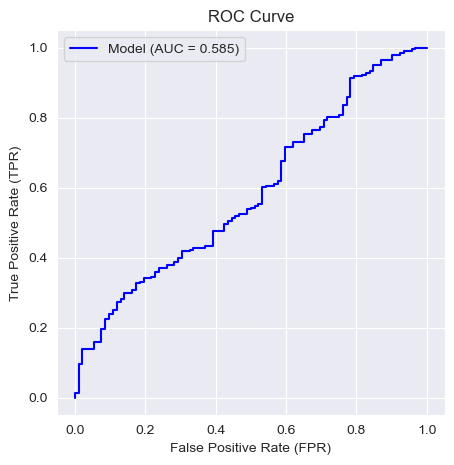

In [74]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_proba_knn)
auc_knn = metrics.roc_auc_score(y_test, y_proba_knn)

# Plot
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label=f"Model (AUC = {auc_knn:.3f})", color='blue')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="upper left")  
plt.show()

In [71]:
kf = KFold(n_splits=5, shuffle=True)
result = cross_val_score(knn, x_train, y_train , cv=kf, scoring="accuracy")
print(result)
print("Max Accuracy: ", result.max())
print("Avg. Accuracy: ", result.mean())

[0.6751269  0.64467005 0.60913706 0.67005076 0.64795918]
Max Accuracy:  0.6751269035532995
Avg. Accuracy:  0.6493887910494147


In [229]:
KNN = [
      metrics.accuracy_score(y_test, y_pred_knn),
      metrics.precision_score(y_test, y_pred_knn),
      metrics.recall_score(y_test, y_pred_knn),
      metrics.f1_score(y_test, y_pred_knn),
      auc_knn]
KNN

[0.5833333333333334,
 0.7172774869109948,
 0.6586538461538461,
 0.6867167919799498,
 0.5846049331103679]

3-Random Forest

In [88]:
rf = RandomForestClassifier(
            n_estimators=150,
            random_state=42, 
            class_weight= 'balanced', 
            max_depth = 150,
            min_samples_split= 8, 
            min_samples_leaf= 8,
            criterion = 'entropy'
)

rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
y_proba_rf = rf.predict_proba(x_test)[:, 1]

Text(0.5, 1.0, 'confusion matrix for Random Forest')

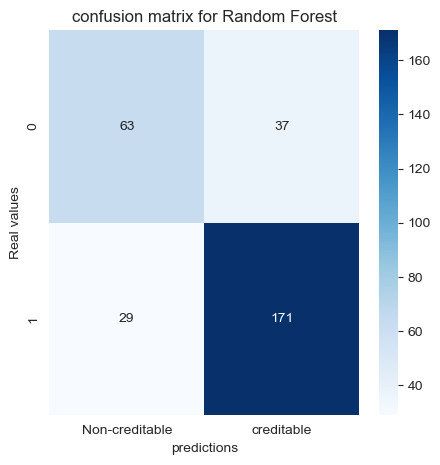

In [89]:
#model evaluation 
cm = metrics.confusion_matrix(y_pred_rf, y_test)
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', yticklabels=['Non-creditable', 'creditable'])
plt.ylabel('predictions')
plt.xlabel('Real values')
plt.title('confusion matrix for Random Forest')

In [90]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.63      0.68      0.66        92
           1       0.85      0.82      0.84       208

    accuracy                           0.78       300
   macro avg       0.74      0.75      0.75       300
weighted avg       0.79      0.78      0.78       300



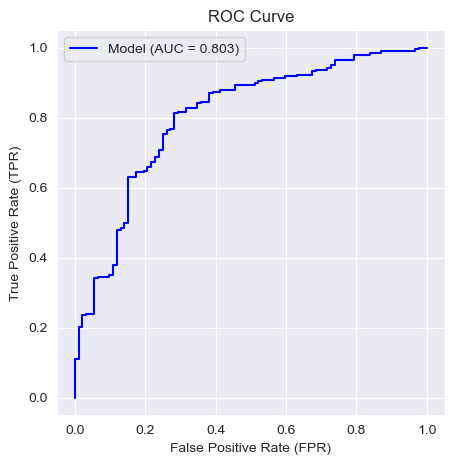

In [91]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_proba_rf)
auc_rf = metrics.roc_auc_score(y_test, y_proba_rf)

# Plot
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label=f"Model (AUC = {auc_rf:.3f})", color='blue')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="upper left")  
plt.show()

In [92]:
kf = KFold(n_splits=5, shuffle=True)
result = cross_val_score(rf, x_train, y_train, cv=kf, scoring="accuracy")
print(result)
print("Max Accuracy: ", result.max())
print("Avg. Accuracy: ", result.mean())

[0.84263959 0.81725888 0.78172589 0.82233503 0.81632653]
Max Accuracy:  0.8426395939086294
Avg. Accuracy:  0.8160571842950379


In [230]:
RF = [
      metrics.accuracy_score(y_test, y_pred_rf),
      metrics.precision_score(y_test, y_pred_rf),
      metrics.recall_score(y_test, y_pred_rf),
      metrics.f1_score(y_test, y_pred_rf),
      auc_rf]
RF

[0.78, 0.855, 0.8221153846153846, 0.8382352941176471, 0.8028846153846154]

4-SVM

In [241]:
gamma = [0.001, 0.0001, 0.00001]
C = list(range(1000, 10000, 500))
degree = [2, 3, 4]

param_grid = {
    'C': C,
    'gamma': gamma,
    'degree': degree,
}
svm = SVC()
grid_search = GridSearchCV(
    estimator= svm,
    param_grid=param_grid,
    cv = 3,
    scoring = 'f1',
    verbose = 2,
    n_jobs= -1
)

In [242]:
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500,
                               5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500,
                               9000, 9500],
                         'degree': [2, 3, 4], 'gamma': [0.001, 0.0001, 1e-05]},
             scoring='f1', verbose=2)

In [243]:
print("Best parameters:", grid_search.best_params_)
svm = SVC(C = 4500, 
          gamma = 0.00001, 
          degree = 2,
          probability= True,
          random_state= 42)

Best parameters: {'C': 4500, 'degree': 2, 'gamma': 1e-05}


In [244]:
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)
y_proba_svm = svm.predict_proba(x_test)[:, 1]

Text(0.5, 1.0, 'confusion matrix for SVM')

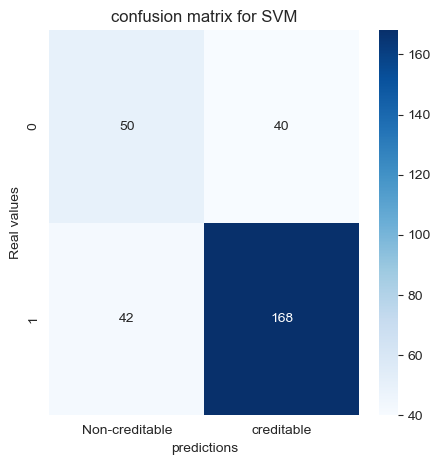

In [245]:
#model evaluation 
cm = metrics.confusion_matrix(y_pred_svm, y_test)
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', yticklabels=['Non-creditable', 'creditable'])
plt.ylabel('predictions')
plt.xlabel('Real values')
plt.title('confusion matrix for SVM')

In [246]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.56      0.54      0.55        92
           1       0.80      0.81      0.80       208

    accuracy                           0.73       300
   macro avg       0.68      0.68      0.68       300
weighted avg       0.73      0.73      0.73       300



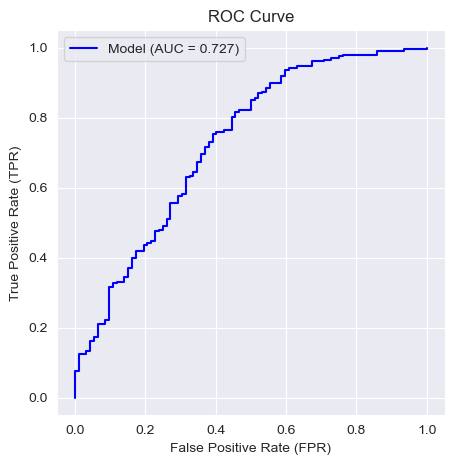

In [247]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_proba_svm)
auc_svm = metrics.roc_auc_score(y_test, y_proba_svm)

# Plot
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label=f"Model (AUC = {auc_svm:.3f})", color='blue')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="upper left")  
plt.show()

In [248]:
kf = KFold(n_splits=5, shuffle=True)
result = cross_val_score(svm, x_train, y_train, cv=kf, scoring="accuracy")
print(result)
print("Max Accuracy: ", result.max())
print("Avg. Accuracy: ", result.mean())

[0.77664975 0.82741117 0.81218274 0.78172589 0.78571429]
Max Accuracy:  0.8274111675126904
Avg. Accuracy:  0.7967367657722987


In [249]:
SVM = [metrics.accuracy_score(y_test, y_pred_svm),
                      metrics.precision_score(y_test, y_pred_svm),
                      metrics.recall_score(y_test, y_pred_svm),
                      metrics.f1_score(y_test, y_pred_svm),
                      auc_svm]
SVM

[0.7266666666666667,
 0.8,
 0.8076923076923077,
 0.8038277511961722,
 0.7272157190635452]


5-Naive Bayes

In [119]:
var_smo = [0.001,
           0.0001,
           0.00001, 
           0.000001,
           0.0000001, 
           0.00000001, 
           0.000000001]
f1s = {}
losses = {}
for var in var_smo:
    gnb = GaussianNB(var_smoothing= var)
    gnb.fit(x_train, y_train)
    y_pred_gnb = gnb.predict(x_test)
    y_proba_gnb = gnb.predict_proba(x_test)[:, 1]
    f1 = round(metrics.f1_score(y_pred_gnb, y_test), 3)
    loss = round(metrics.log_loss(y_test, y_proba_gnb), 3)
    losses[var] = loss
    f1s[var] = f1

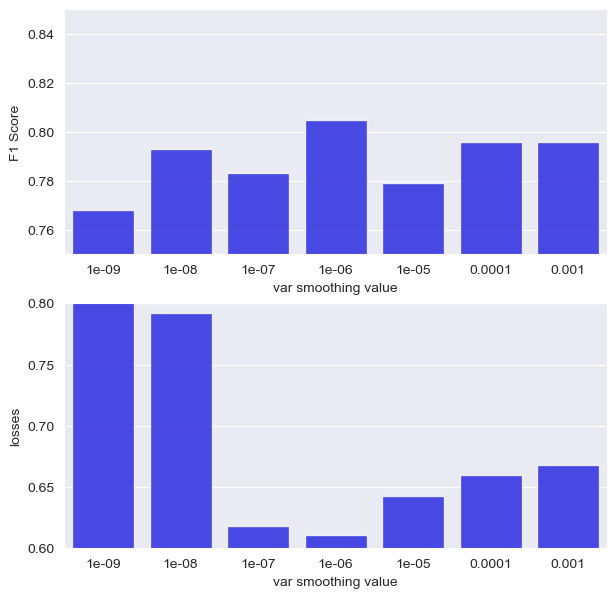

In [126]:
plt.figure(figsize = (7,7))

plt.subplot(2, 1, 1)
sns.barplot(x = f1s.keys(), y = f1s.values(), color = 'Blue', alpha = 0.8)
plt.xlabel("var smoothing value")
plt.ylabel("F1 Score")
plt.ylim(0.75,0.85)

plt.subplot(2, 1, 2)
sns.barplot(x = losses.keys(), y = losses.values(), color = 'blue', alpha = 0.8)
plt.xlabel("var smoothing value")
plt.ylabel("losses")
plt.ylim(0.6,0.8)

plt.show()

the optimum value for var_smoothing is 1e-6

In [127]:
gnb = GaussianNB(var_smoothing= 0.000001)
gnb.fit(x_train, y_train)
y_pred_gnb = gnb.predict(x_test)
y_proba_gnb = gnb.predict_proba(x_test)[:, 1]

Text(0.5, 1.0, 'confusion matrix for Naive Bayes')

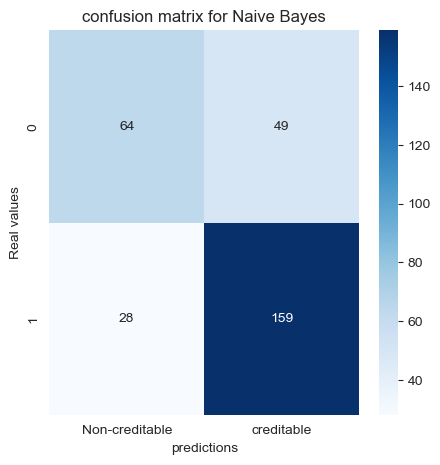

In [170]:
#model evaluation 
cm = metrics.confusion_matrix(y_pred_gnb, y_test)
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', yticklabels=['Non-creditable', 'creditable'])
plt.ylabel('predictions')
plt.xlabel('Real values')
plt.title('confusion matrix for Naive Bayes')

In [129]:
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.57      0.70      0.62        92
           1       0.85      0.76      0.81       208

    accuracy                           0.74       300
   macro avg       0.71      0.73      0.71       300
weighted avg       0.76      0.74      0.75       300



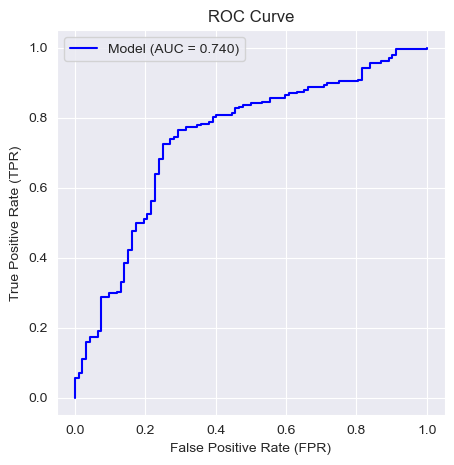

In [130]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_proba_gnb)
auc_gnb = metrics.roc_auc_score(y_test, y_proba_gnb)

# Plot
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label=f"Model (AUC = {auc_gnb:.3f})", color='blue')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="upper left")  
plt.show()

In [1]:
kf = KFold(n_splits=5, shuffle=True)
result = cross_val_score(gnb, x_train, y_train, cv=kf, scoring="accuracy")
print(result)
print("Max Accuracy: ", result.max())
print("Avg. Accuracy: ", result.mean())

NameError: name 'KFold' is not defined

In [236]:
NB = [metrics.accuracy_score(y_test, y_pred_gnb),
       metrics.precision_score(y_test, y_pred_gnb),
       metrics.recall_score(y_test, y_pred_gnb),
       metrics.f1_score(y_test, y_pred_gnb),
       auc_gnb]
NB

[0.7433333333333333,
 0.8502673796791443,
 0.7644230769230769,
 0.8050632911392405,
 0.7401233277591974]

Final Result & Summary 

In [251]:
models = [LogisticRegression, 
          KNN, 
          RF, 
          SVM, 
          NB
]
columns = ['Accuracy', 'Precision', 'Recall', 'f1-score', 'AUC-score']
index = ['Logistic Regression', 'K Nearest Neighbour', 'Random Forest', 'Support Vector Machines', 'Naive Bayes']
summary = pd.DataFrame(data= models, index=index, columns= columns)
summary

,Accuracy,Precision,Recall,f1-score,AUC-score
Logistic Regression,0.760000,0.843434,0.802885,0.822660,0.792172
K Nearest Neighbour,0.583333,0.717277,0.658654,0.686717,0.584605
Random Forest,0.780000,0.855000,0.822115,0.838235,0.802885
Support Vector Machines,0.726667,0.800000,0.807692,0.803828,0.727216
Naive Bayes,0.743333,0.850267,0.764423,0.805063,0.740123



From the analysis of the above table, we can understand that the model with Random Fores, Naive Bayes & Logistic Regression performed well, compared to others. The precision score is highest in Regression but Accuracy, Recall score and F1 score is best with the Random Forest & Naive Bayes.


In [ ]:
# import joblib
# joblib.dump(model, 'Creditability.pkl')